# Propensity Score Matcher

In this notebook, we show the basic usage of the PropensityScoreMatcher. Unlike the GeneticMatcher and ConstraintSatisfactionMatcher, the PropensityScoreMatcher does not directly optimize a  particular balance score. Instead, the PropensityScoreMatcher uses the given objective as a measure of "correctness" of the propensity score model. The matcher tries a (possibly large) number of potential models and returns the model with the best score according to the given metric.

In [1]:
import logging 
logging.basicConfig(
    format="%(levelname)-4s [%(filename)s:%(lineno)d] %(message)s",
    level='INFO',
)

from pybalance.utils import *
from pybalance.datasets import load_toy_data
from pybalance.propensity import PropensityScoreMatcher, plot_propensity_score_match_distributions
from pybalance.visualization import (
    plot_numeric_features, 
    plot_categoric_features, 
    plot_binary_features,
    plot_joint_numeric_distributions,
    plot_per_feature_loss
)

INFO [__init__.py:15] Loaded pybalance version 0.1.0.


In [2]:
m = load_toy_data()
m

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
0,27.645573,99.109461,166.063797,1.0,3,0,0.0,1.0,0.0,1.0,pool
1,33.210317,77.522517,148.959166,1.0,4,0,0.0,0.0,0.0,0.0,pool
2,31.281790,77.648391,126.943639,1.0,4,0,0.0,1.0,0.0,0.0,pool
3,37.924484,104.850881,170.009417,1.0,3,0,0.0,1.0,0.0,1.0,pool
4,60.925960,72.027406,144.841497,0.0,3,1,0.0,0.0,0.0,0.0,pool
...,...,...,...,...,...,...,...,...,...,...,...
10995,55.312681,54.187498,165.066254,1.0,5,2,0.0,0.0,0.0,1.0,target
10996,52.996259,67.788246,166.339659,1.0,4,2,0.0,1.0,0.0,0.0,target
10997,48.535829,76.827444,145.047366,1.0,1,1,0.0,0.0,0.0,0.0,target
10998,35.395455,60.470689,157.368874,1.0,4,0,0.0,0.0,0.0,0.0,target


## Optimize Beta (Mean Absolute SMD)


In [3]:
# Note that using a caliper can result in matched population being 
# smaller than target! If this is undesired, do not use a caliper.
objective = beta = BetaBalance(m)
matcher = PropensityScoreMatcher(
    matching_data=m,
    objective=objective,
    time_limit=900,
    max_iter=250)
matcher.get_params()

{'objective': 'beta',
 'caliper': None,
 'max_iter': 250,
 'time_limit': 900,
 'method': 'greedy'}

In [4]:
matcher.match()

INFO [matcher.py:181] Training model SGDClassifier (iter 1/250, 0.001 min) ...
INFO [matcher.py:137] Best propensity score match found:
INFO [matcher.py:138] 	Model: SGDClassifier
INFO [matcher.py:140] 	* alpha: 4.141156269278248
INFO [matcher.py:140] 	* class_weight: None
INFO [matcher.py:140] 	* early_stopping: False
INFO [matcher.py:140] 	* fit_intercept: True
INFO [matcher.py:140] 	* loss: modified_huber
INFO [matcher.py:140] 	* max_iter: 1500
INFO [matcher.py:140] 	* penalty: elasticnet
INFO [matcher.py:141] 	Score (beta): 0.1572
INFO [matcher.py:142] 	Solution time: 0.003 min
INFO [matcher.py:181] Training model LogisticRegression (iter 2/250, 0.003 min) ...
INFO [matcher.py:137] Best propensity score match found:
INFO [matcher.py:138] 	Model: LogisticRegression
INFO [matcher.py:140] 	* C: 0.9197790037858767
INFO [matcher.py:140] 	* fit_intercept: True
INFO [matcher.py:140] 	* max_iter: 500
INFO [matcher.py:140] 	* penalty: l2
INFO [matcher.py:140] 	* solver: saga
INFO [matcher.p

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
7617,18.301073,55.475950,149.370088,1.0,1,1,0.0,1.0,1.0,0.0,pool
476,57.583090,66.204955,146.378645,1.0,1,0,0.0,1.0,0.0,0.0,pool
4947,37.662932,70.053423,126.217286,0.0,1,1,0.0,0.0,1.0,0.0,pool
4291,60.616165,78.200365,149.915368,0.0,3,2,0.0,1.0,0.0,0.0,pool
4948,51.058875,81.226613,154.105787,0.0,2,0,0.0,0.0,0.0,0.0,pool
...,...,...,...,...,...,...,...,...,...,...,...
10995,55.312681,54.187498,165.066254,1.0,5,2,0.0,0.0,0.0,1.0,target
10996,52.996259,67.788246,166.339659,1.0,4,2,0.0,1.0,0.0,0.0,target
10997,48.535829,76.827444,145.047366,1.0,1,1,0.0,0.0,0.0,0.0,target
10998,35.395455,60.470689,157.368874,1.0,4,0,0.0,0.0,0.0,0.0,target


/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


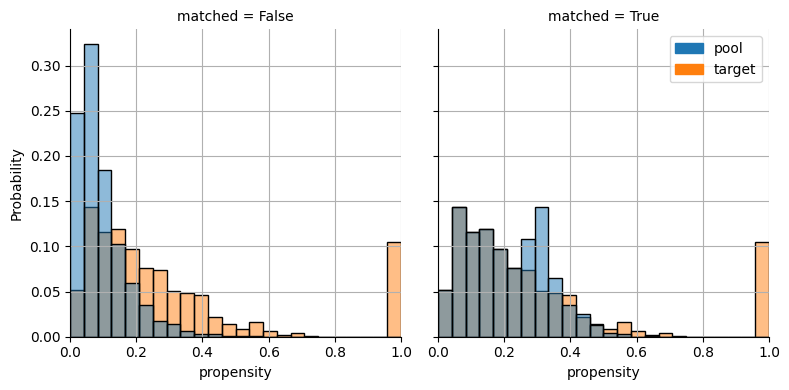

In [5]:
%matplotlib inline
plot_propensity_score_match_distributions(matcher)


INFO [matcher.py:137] Best propensity score match found:
INFO [matcher.py:138] 	Model: LogisticRegression
INFO [matcher.py:140] 	* C: 13.678978460195781
INFO [matcher.py:140] 	* fit_intercept: False
INFO [matcher.py:140] 	* max_iter: 500
INFO [matcher.py:140] 	* penalty: l1
INFO [matcher.py:140] 	* solver: saga
INFO [matcher.py:141] 	Score (beta): 0.0284
INFO [matcher.py:142] 	Solution time: 0.260 min


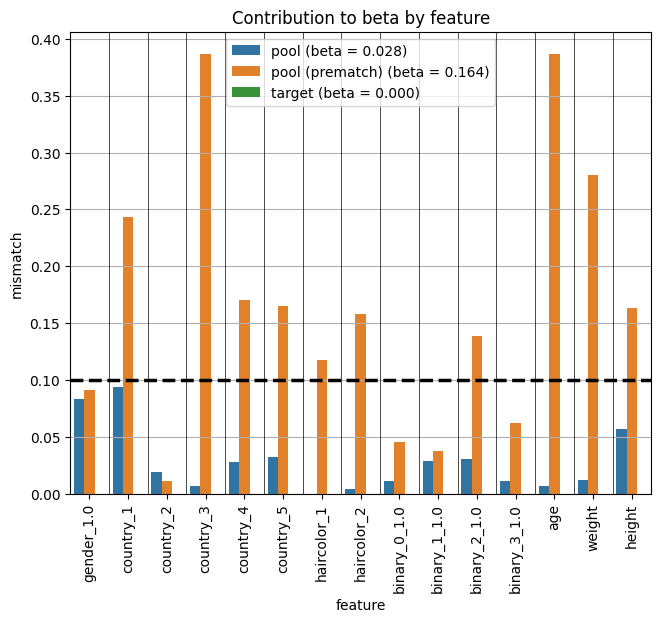

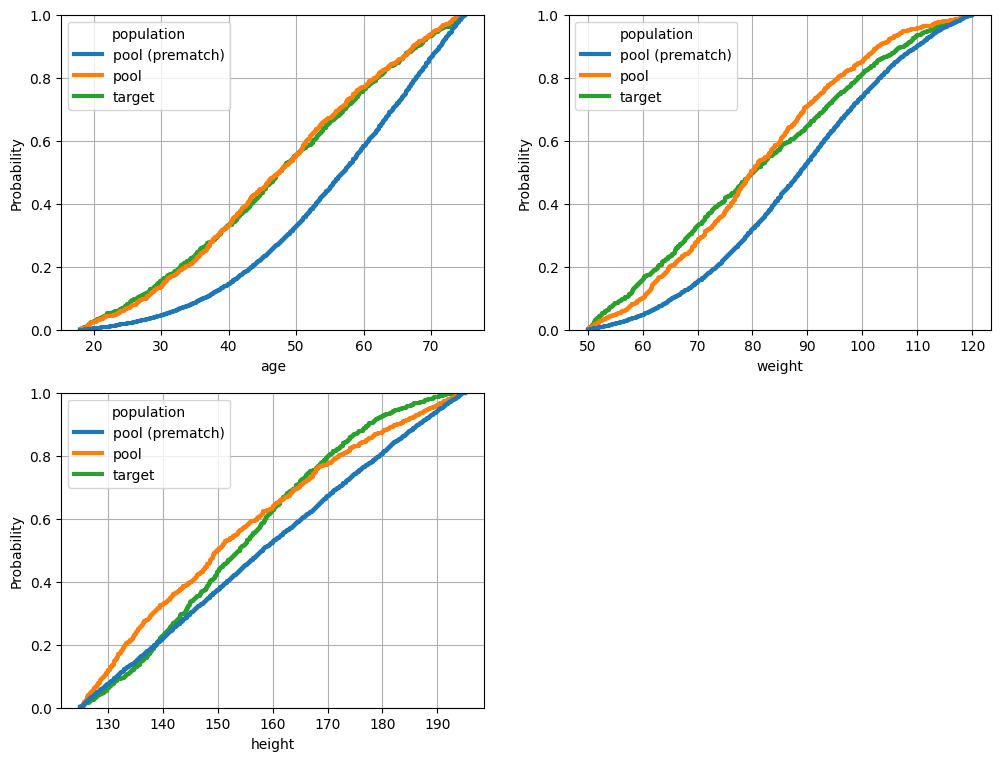

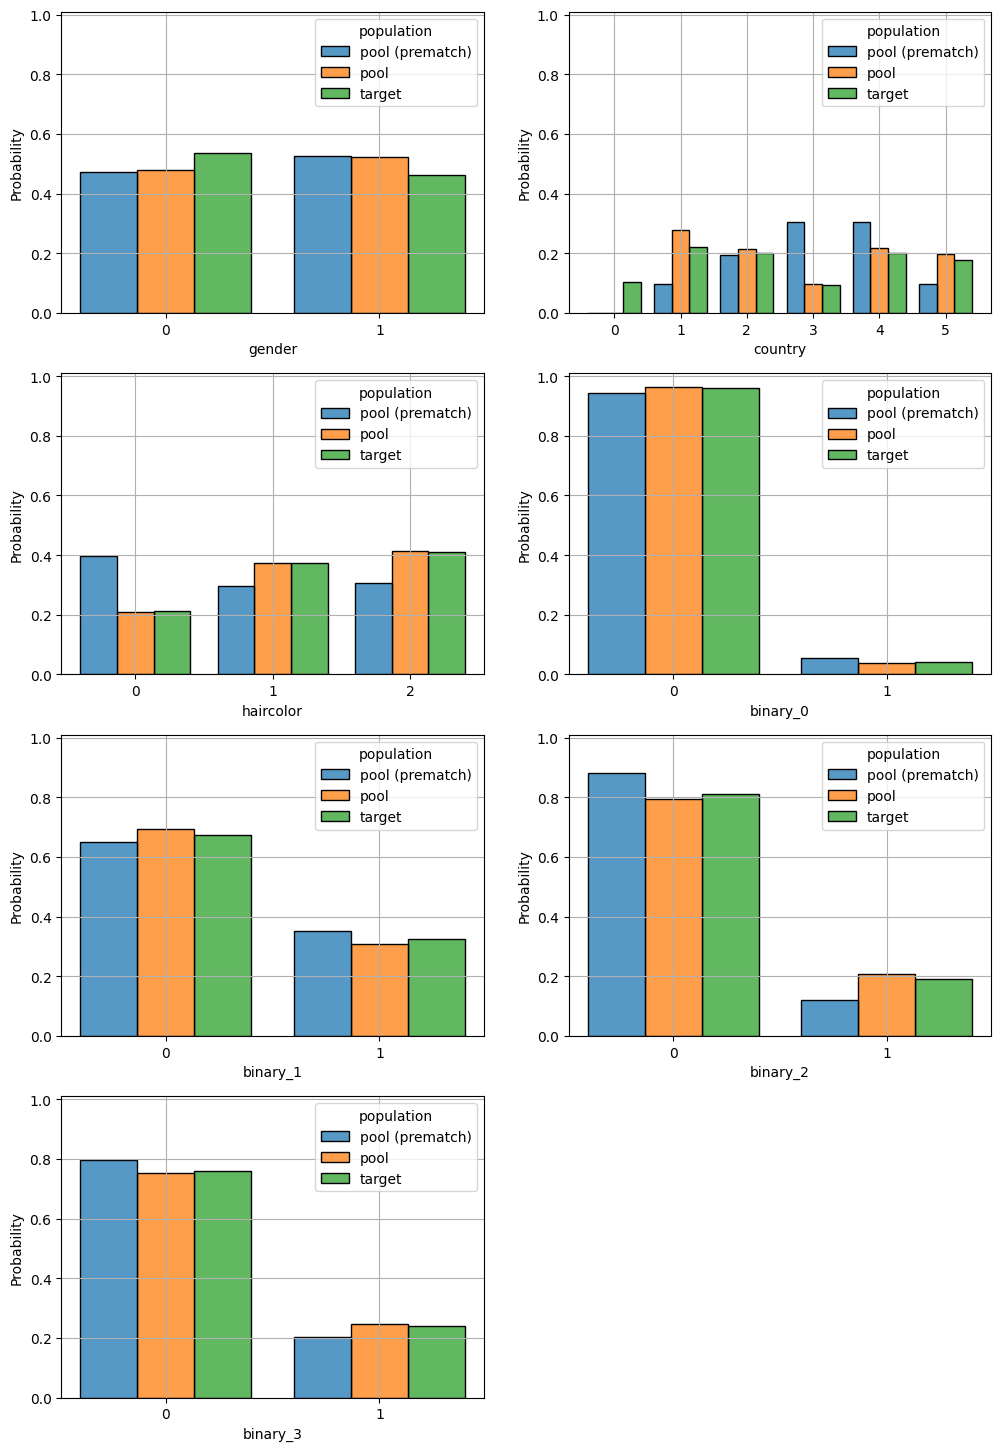

In [6]:
%matplotlib inline
objective = beta = BetaBalance(m)

match = matcher.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, beta, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])